In [1]:
# Comment Type Legend:

#* = highlight
#! = alert
#? = questions
#TODO = task
#// = strikethrough

# 1. Preparing Our Dataset

In [2]:
import pandas as pd

# Read the track metadata with genre labels:
tracks = pd.read_csv(r'C:\Users\sando\OneDrive\Escritorio\Classify_Song_from_Audio_Data\Datasets\fma-rock-vs-hiphop.csv', encoding='UTF-8')

#* NOTE: when reading csv files make sure to use the right encoding, 
#* the encoding can be found by opening the file with the notepad and checking the bottom right corner

# Read in track metrics with the feature:
echonest_metrics = pd.read_json(r'C:\Users\sando\OneDrive\Escritorio\Classify_Song_from_Audio_Data\Datasets\echonest-metrics.json', precise_float= True)

In [3]:
tracks.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
echonest_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [5]:
# Merge the track_id and genre_top columns of tracks and echonest_metrics on track_id values
echo_tracks = pd.merge(left= tracks[['track_id', 'genre_top']], right = echonest_metrics)
#* Note: notice the merging technique used for only merging specific columns from one of the tables
echo_tracks.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [6]:
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   genre_top         4802 non-null   object 
 2   acousticness      4802 non-null   float64
 3   danceability      4802 non-null   float64
 4   energy            4802 non-null   float64
 5   instrumentalness  4802 non-null   float64
 6   liveness          4802 non-null   float64
 7   speechiness       4802 non-null   float64
 8   tempo             4802 non-null   float64
 9   valence           4802 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


In [7]:
echo_tracks['genre_top']

0          Rock
1          Rock
2          Rock
3          Rock
4          Rock
         ...   
4797    Hip-Hop
4798    Hip-Hop
4799    Hip-Hop
4800    Hip-Hop
4801    Hip-Hop
Name: genre_top, Length: 4802, dtype: object

In [8]:
echo_tracks['track_id']

0          153
1          154
2          155
3          169
4          170
         ...  
4797    124718
4798    124719
4799    124720
4800    124721
4801    124722
Name: track_id, Length: 4802, dtype: int64

# 2. Pairwise Relationships Between Continuous Variables 

In [9]:
# Create a correlation matrix
corr_matrix = echo_tracks.drop('genre_top', axis = 'columns').corr()
corr_matrix.style.background_gradient()


,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


# 3. Normalizing the Feature Data

As mentioned earlier, it can be particularly useful to simplify our models and use as few features as necessary to achieve the best result. Since we didn't find any particular strong
correlations between our features, we can instead use a common approach to reduce the number of features called principal component analysis (PCA). It is possible that the variance 
between genres can be explained by just a few features in the dataset. PCA rotates the data along the axis of highest variance, thus allowing us to determine the relative contribution 
of each feature of our data towards the variance between classes.

However, since PCA uses the absolute variance of a feature to rotate the data, a feature with a broader range of values will overpower and bias the algorithm relative to the other features. 
To avoid this, we must first normalize our data. There are a few methods to do this, but a common way is through standardization, such that all features have a mean = 0 and standard deviation = 1 (the resultant is a z-score).

In [10]:
# Define our features:
features = echo_tracks.drop(['genre_top', 'track_id'], axis = 1)
#* 'genre_top' gets dropped because this is our target variable
#* 'genre_id' gets dropped because it's not really relevant to out analysis

# Define our labels:
labels = echo_tracks['genre_top']
labels

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable:
scaler = StandardScaler() 
x_train_scaled = scaler.fit_transform(features)

# 4. Principal Component Analysis on Our Scaled Data
Now that we have preprocessed our data, we are ready to use PCA to determine by how much we can reduce the dimensionality of our data. We can use scree-plots and cumulative explained ratio plots to find the number of components to use in further analyses.

Scree-plots display the number of components against the variance explained by each component, sorted in descending order of variance. Scree-plots help us get a better sense of which components explain a sufficient amount of variance in our data. When using scree plots, an 'elbow' (a steep drop from one data point to the next) in the plot is typically used to decide on an appropriate cutoff.

In [11]:
# This is to make plots appear in the notebook:
%matplotlib inline

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit_transform(x_train_scaled)
exp_variance_ratio = pca.explained_variance_ratio_
exp_variance_ratio

#* Explained variance ratio is a measure of the proportion of the total variance in the original dataset that is explained by each principal component. The explained variance ratio of a principal component is equal to the ratio of its eigenvalue to the sum of the eigenvalues of all the principal components.

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

In [12]:
#TODO: How is exp_variance_ration calculated? 

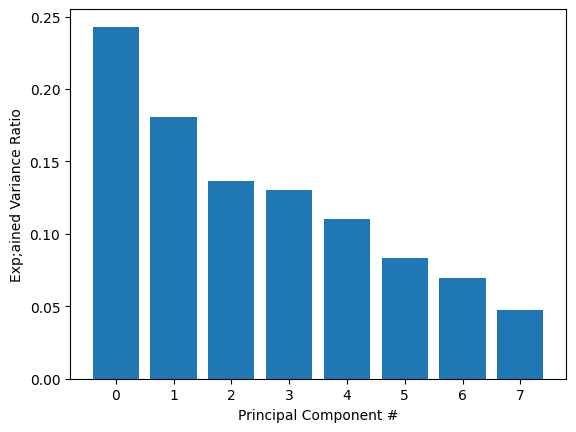

In [13]:
# Plot the explained variance using a barplot

fig, ax = plt.subplots()
ax.bar(range(pca.n_components_),exp_variance_ratio)
ax.set_xlabel('Principal Component #')
ax.set_ylabel('Exp;ained Variance Ratio')
plt.show()

# 5. Further Visualization of PCA
Unfortunately, there does not appear to be a clear elbow in this scree plot, which means it is not straightforward to find the number of intrinsic dimensions using this method.

But all is not lost! Instead, we can also look at the cumulative explained variance plot to determine how many features are required to explain, say, about 90% of the variance (cutoffs are somewhat arbitrary here, and usually decided upon by 'rules of thumb'). Once we determine the appropriate number of components, we can perform PCA with that many components, ideally reducing the dimensionality of our data.

In [14]:
# Import numpy
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance_ratio)
cum_exp_variance

array([0.24297674, 0.4234199 , 0.55992299, 0.68986388, 0.80042636,
       0.88344881, 0.95268664, 1.        ])

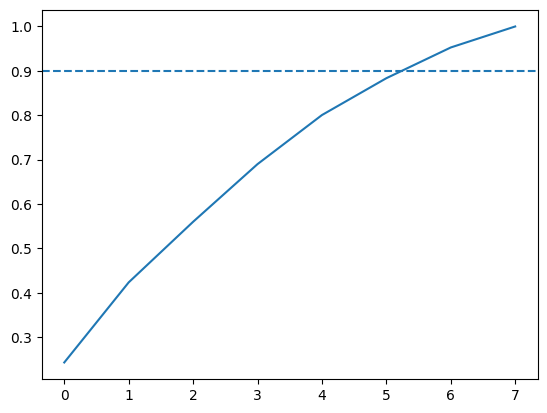

In [15]:
# Plot the cumulative explained variance and draw a dashed line at 0.90:
fig, ax = plt.subplots()
ax.plot(range(8), cum_exp_variance)
ax.axhline(y = 0.90, linestyle = '--')
plt.show()

In [16]:
# Choose the desired amount of components:
n_components = 7

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state = 10)
pca.fit(x_train_scaled)
pca_projection = pca.transform(x_train_scaled)
#* 'pca.transform(X)' applies the learned transformation to the input data X, resulting in a lower-dimensional representation
pca_projection

pca_projection.shape


(4802, 7)

# 6. Train a Decision Tree to Classify Genre
Now we can use the lower dimensional PCA projection of the data to classify songs into genres. To do that, we first need to split our dataset into 'train' and 'test' subsets, where the 'train' subset will be used to train our model while the 'test' dataset allows for model performance validation.

Here, we will be using a simple algorithm known as a decision tree. Decision trees are rule-based classifiers that take in features and follow a 'tree structure' of binary decisions to ultimately classify a data point into one of two or more categories. In addition to being easy to both use and interpret, decision trees allow us to visualize the 'logic flowchart' that the model generates from the training data.

Here is an example of a decision tree that demonstrates the process by which an input image (in this case, of a shape) might be classified based on the number of sides it has and whether it is rotated.

In [17]:
# Import train_test_split function and decision tree classifier
from sklearn.model_selection import train_test_split

#1. Splitting Our Data:
#* train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, stratify = labels)
x_train, x_test, y_train, y_test = train_test_split(pca_projection, labels, stratify = labels)

#* When you use the stratify argument, you pass a target array (usually your labels) that you want to use for stratification. This ensures that the proportions of classes in the training and testing sets are approximately the same as in the original dataset. 

#2. Training Our Decision Tree:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 10)
tree.fit(x_train, y_train)

#3. Predict the Labels for the Test Data:
tree_predicted_labels = tree.predict(x_test)

In [18]:
# Import and calculate the accuracy score
from sklearn.metrics import accuracy_score
#* accuracy_score(y_true, y_pred)
accuracy_score(y_test, tree_predicted_labels)

0.8717735220649458

In [19]:
#* PCA = 5 >> Accuracy = 0.8451290591174022
#* PCA = 7 >> Accuracy = 0.8667776852622814

In [20]:
labels.value_counts()

genre_top
Rock       3892
Hip-Hop     910
Name: count, dtype: int64

## Structure of a Confusion Matrix


A confusion matrix is a table used to evaluate the performance of a classification model by comparing the predicted labels with the true labels. It provides a detailed breakdown of the model's performance, showing not only how many predictions were correct but also how many were incorrect and in what way.

For a binary classification problem, the confusion matrix is typically a 2x2 table that looks like this:

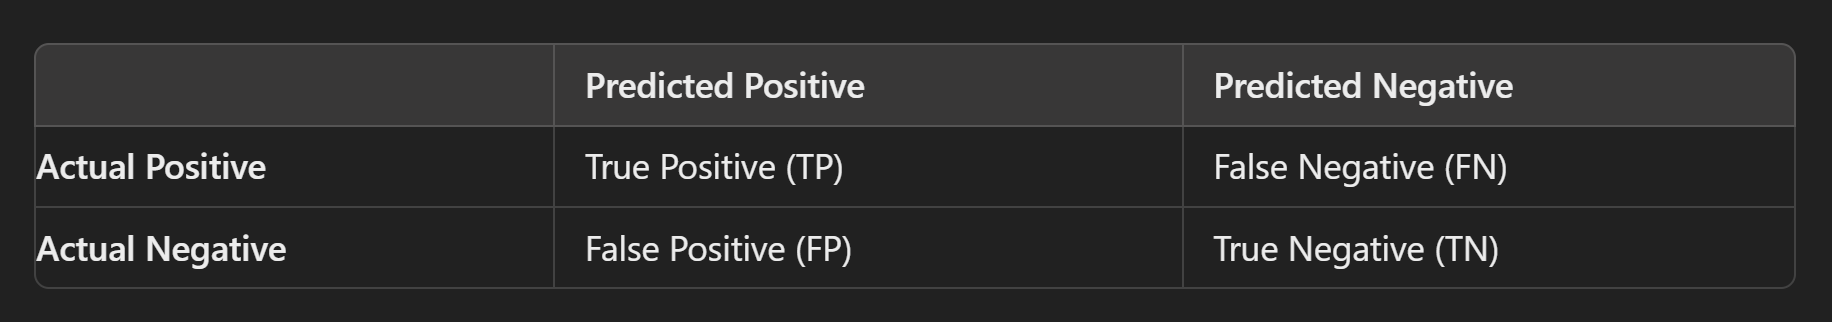

Our data is imbalanced, so here accuracy is not really a good metric. Let's look at the confusion matrix.

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, tree_predicted_labels)

array([[161,  67],
       [ 87, 886]], dtype=int64)

# 7. Compare our decision tree to a logistic regression
Although our tree's performance is decent, it's a bad idea to immediately assume that it's therefore the perfect tool for this job -- there's always the possibility of other models that will perform even better! It's always a worthwhile idea to at least test a few other algorithms and find the one that's best for our data.

Sometimes simplest is best, and so we will start by applying logistic regression. Logistic regression makes use of what's called the logistic function to calculate the odds that a given data point belongs to a given class. Once we have both models, we can compare them on a few performance metrics, such as false positive and false negative rate (or how many points are inaccurately classified).

In [22]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our LogisticRegression and predict labels for the test set
logreg = LogisticRegression(random_state= 10)
logreg.fit(x_train, y_train)
lr_predicted_labels = logreg.predict(x_test)

# Create the classfication report for both models
from sklearn.metrics import  classification_report
class_rep_tree = classification_report(y_test, tree_predicted_labels)
class_rep_log = classification_report(y_test, lr_predicted_labels)

print('Decision Tree: \n', class_rep_tree)
print('Logistic Regression: \n', class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.65      0.71      0.68       228
        Rock       0.93      0.91      0.92       973

    accuracy                           0.87      1201
   macro avg       0.79      0.81      0.80      1201
weighted avg       0.88      0.87      0.87      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.82      0.57      0.67       228
        Rock       0.91      0.97      0.94       973

    accuracy                           0.89      1201
   macro avg       0.86      0.77      0.80      1201
weighted avg       0.89      0.89      0.89      1201



# 8. Balance our data for greater performance
Both our models do similarly well, boasting an average precision of 87% each. However, looking at our classification report, we can see that rock songs are fairly well classified, but hip-hop songs are disproportionately misclassified as rock songs.

Why might this be the case? Well, just by looking at the number of data points we have for each class, we see that we have far more data points for the rock classification than for hip-hop, potentially skewing our model's ability to distinguish between classes. This also tells us that most of our model's accuracy is driven by its ability to classify just rock songs, which is less than ideal.

To account for this, we can weight the value of a correct classification in each class inversely to the occurrence of data points for each class. Since a correct classification for "Rock" is not more important than a correct classification for "Hip-Hop" (and vice versa), we only need to account for differences in sample size of our data points when weighting our classes here, and not relative importance of each class.

In [23]:
# Subset only the hip-hop tracks, and then only the rock tracks
hop_only = echo_tracks[echo_tracks['genre_top'] == 'Hip-Hop']
hop_only.head()
rock_only = echo_tracks[echo_tracks['genre_top'] == 'Rock']
rock_only.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [24]:
rock_only.shape, hop_only.shape

((3892, 10), (910, 10))

In [25]:
# Sample the rock songs to be the same number as there are hip-hop songs
rock_only = rock_only.sample(n = hop_only.shape[0])
rock_only.shape, hop_only.shape

((910, 10), (910, 10))

In [26]:
# Concatenate the dataframes rock_only and hop_only
rock_hop_bal = pd.concat(objs = [rock_only, hop_only])
rock_hop_bal.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
25,305,Rock,0.764248,0.733112,0.079487,0.935461,0.111641,0.042529,108.131,0.107946
710,3868,Rock,0.575892,0.189795,0.923837,0.794144,0.174988,0.046474,141.898,0.181426
2552,36724,Rock,0.310414,0.156027,0.580893,0.855622,0.104849,0.034833,78.285,0.148798
3414,63773,Rock,0.210421,0.688808,0.782481,0.472171,0.153042,0.032770,113.305,0.714280
1008,5062,Rock,0.014747,0.244418,0.479595,0.893116,0.111902,0.034145,87.133,0.243167


In [27]:
# The features, labels, and PCA projection are created for the balanced dataframe
features = rock_hop_bal.drop(['track_id', 'genre_top'], axis = 1)
labels = rock_hop_bal['genre_top']
pca_projection = pca.fit_transform(scaler.fit_transform(features))

# Redefine the train and test set with the pca_projection from the balanced data
x_train, x_test, y_train, y_test = train_test_split(pca_projection, labels, stratify = labels, random_state = 10)


# 9. Does balancing our dataset improve model bias?
We've now balanced our dataset, but in doing so, we've removed a lot of data points that might have been crucial to training our models. Let's test to see if balancing our data improves model bias towards the "Rock" classification while retaining overall classification performance.

Note that we have already reduced the size of our dataset and will go forward without applying any dimensionality reduction. In practice, we would consider dimensionality reduction more rigorously when dealing with vastly large datasets and when computation times become prohibitively large.

In [28]:

#* General Outline:
#* 1. Define the model object
#* 2. Fit the model using the feature matrix for the first argument and the target vector for the second
#*    model.fit(x_train, y_train)
#* 3. Predict the labels using model.predict(x_test)
#* 4. Evaluate your model

# Train our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state = 10)
tree.fit(x_train, y_train)
tree_predicted_labels = tree.predict(x_test)

# Train our LogisticRegression on the balanced data
logreg = LogisticRegression(random_state = 10)
logreg.fit(x_train, y_train)
lr_predicted_labels = logreg.predict(x_test)

# Compare the model
print("Decision Tree: \n", classification_report(y_true = y_test, y_pred = tree_predicted_labels))
print("Logistic Regression: \n", classification_report(y_true = y_test, y_pred = lr_predicted_labels))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.83      0.80       227
        Rock       0.82      0.75      0.78       228

    accuracy                           0.79       455
   macro avg       0.79      0.79      0.79       455
weighted avg       0.79      0.79      0.79       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.86      0.79      0.82       227
        Rock       0.81      0.88      0.84       228

    accuracy                           0.83       455
   macro avg       0.84      0.83      0.83       455
weighted avg       0.84      0.83      0.83       455



Success! Balancing our data has removed bias towards the more prevalent class. To get a good sense of how well our models are actually performing, we can apply what's called cross-validation (CV). This step allows us to compare models in a more rigorous fashion.

# 10. Using Cross-Validation to Evaluate Our Models
Since the way our data is split into train and test sets can impact model performance, CV attempts to split the data multiple ways and test the model on each of the splits. Although there are many different CV methods, all with their own advantages and disadvantages, we will use what's known as K-fold CV here. K-fold first splits the data into K different, equally sized subsets. Then, it iteratively uses each subset as a test set while using the remainder of the data as train sets. Finally, we can then aggregate the results from each fold for a final model performance score.

In [29]:
from sklearn.model_selection import KFold, cross_val_score

# Set up our k-fold cross-validation
kf = KFold(n_splits= 10, shuffle= True, random_state= 10)

tree = DecisionTreeClassifier(random_state= 10)
lr = LogisticRegression(random_state= 10)

# Train our models using k-fold cv
tree_score = cross_val_score(estimator= tree, X= pca_projection, y= labels, cv= kf)
lr_score = cross_val_score(estimator= lr, X= pca_projection, y= labels, cv= kf)

# Print the mean of each array of scores
print("Decision Tree: ", np.mean(tree_score),
    "Logistic Regression: ", np.mean(lr_score))

Decision Tree:  0.7950549450549451 Logistic Regression:  0.8543956043956044


We can see here that our simple Logistic Regression model performed better than the Decision tree model on the balanced Data.